<a href="https://colab.research.google.com/github/Shreyasvaidya/Tryst_iitd/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
DATA_PATH = "/content/drive/My Drive/autobot-tryst-dataset"


Mounted at /content/drive


uploading files of gdrive to colab

In [ ]:
!cp /content/drive/MyDrive/autobot-tryst-dataset/Animal/animal.zip /content/
!cp /content/drive/MyDrive/autobot-tryst-dataset/Person/person.zip /content/
!cp /content/drive/MyDrive/autobot-tryst-dataset/Stop\ sign/stop.zip /content/
!cp /content/drive/MyDrive/autobot-tryst-dataset/Traffic\ Cones/roadCones.zip /content/
!cp /content/drive/MyDrive/autobot-tryst-dataset/Traffic\ lights/trafficLights_complete.zip /content/





copying the datasets

In [ ]:
!unzip animal.zip
!unzip person.zip
!unzip stop.zip
!unzip roadCones.zip
!unzip trafficLights_complete.zip


Streaming output truncated to the last 5000 lines.
  inflating: dataset/person/5b80ba28-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/88e88a18-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/6b9c0cc8-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/6953d1e4-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/09df0382-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/4e8033da-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/60030cc2-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/76140d68-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/f531ab24-ae6c-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/8bcb18a4-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/7c0a9458-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/fc8658f2-ae6c-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/person/3f4a964e-ae6d-11ec-8395-5ca6e6e3ecc8.jpg  
  inflating: dataset/perso

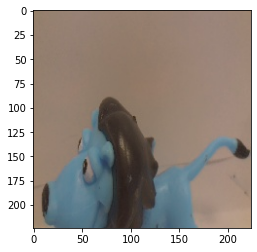

In [ ]:
array=cv2.imread("/content/dataset/animal/9ef65814-ae66-11ec-8c1a-5ca6e6e3ecc8.jpg")#converting to grayscale as colors dont matter here
plt.imshow(array)
plt.show()
           

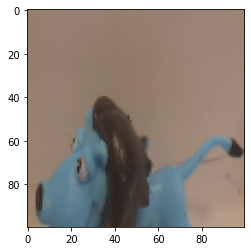

In [ ]:
resolution=(100,100)#reducing resolution a bit for easier training
array=cv2.resize(array,resolution)
plt.imshow(array)
plt.show()

In [ ]:
resolution=(100,100)
training_data=[]
path="/content/dataset/animal"
for i in tqdm(os.listdir(path)):
  try:
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,0])
  except:
    pass   
path="/content/dataset/person/"  
for i in tqdm(os.listdir(path)):
  try:      
  
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,1])
  except:
    pass  
path="/content/dataset/roadCones/"  
for i in tqdm(os.listdir(path)):
  try:  
  
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,2])    
  except:
    pass
path="/content/dataset3/blocked/"  
for i in tqdm(os.listdir(path)):
  try:  
  
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,3])    
  except:
    pass
path="/content/trafficLight_complete/blue"  
for i in tqdm(os.listdir(path)):
  try:  
  
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,4])    
  except:
    pass

path="/content/trafficLight_complete/green/"  
for i in tqdm(os.listdir(path)):
  try:  
  
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,5])    
  except:
    pass
path="/content/trafficLight_complete/red/"  
for i in tqdm(os.listdir(path)):
  try:  
  
  
    array=cv2.imread(os.path.join(path,i))
    resized_array=cv2.resize(array,resolution)
    training_data.append([resized_array,6])    
  except:
    pass




100%|██████████| 336/336 [00:00<00:00, 906.26it/s]


converting image to arrays

In [ ]:
print(training_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import random
random.shuffle(training_data)
for i in range(10):

  print(training_data[i][1])

0
4
0
2
1
4
6
1
6
1


Shufffling data

In [ ]:
X=[]
y=[]
for i in training_data:
    X.append(i[0])
    y.append(i[1])
import numpy as np    
X=np.array(X).reshape(-1,100,100,3)  

In [ ]:
X=X/255

normalising for easier training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Conv2D,MaxPooling2D
import pickle
import numpy as np

In [ ]:
model=Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(7))
model.add(Activation('softmax'))

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
X=np.array(X)
y=np.array(y)
weights={0:1,1:1,2:1,3:3,4:6,5:6,6:6}

In [ ]:
print(len(training_data))

6850


In [ ]:
model.fit(X,y,epochs=3,validation_split=0.1,class_weight=weights)

Epoch 1/3
193/193 [==============================] - 1066s 6s/step - loss: 0.0443 - accuracy: 0.9875 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 2/3
193/193 [==============================] - 1064s 6s/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0219 - val_accuracy: 0.9942
Epoch 3/3
193/193 [==============================] - 1075s 6s/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0097 - val_accuracy: 0.9971


In [ ]:
model.save("iitd_model.h5")

0-animal,1-human,2-roadcones 3-stop sign 4-blue5-green 6-red